In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
df = pd.read_csv("dataset/fcc-forum-pageviews.csv", index_col=["date"], parse_dates=True)

In [3]:
df = df[
    (df["value"] >= df["value"].quantile(0.025)) &
    (df["value"] <= df["value"].quantile(0.975))
]

# This is to exclude the outliers in the dataset. 


In [4]:
def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15,5))
    ax.plot(df.index, df["value"], color= "red",linewidth=1)
    #ax.plot() is a method used to draw a line plot on a specific axes object (ax) within a figure (fig), red color if for the line. Linewidth is the width of that specific line.

    #  df.index
    # What it is: The x-axis data.
    # Why used: Often in time series data, the index is a DatetimeIndex (e.g., dates), and you want to plot time on the x-axis.
    # Sp, wehn passing df.index it is indicating the values for x.
    # For y the value is df["value"]

    ax.set_title("Daily freecodecamp Forum Page Views")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    return fig

In [5]:
def draw_bar_plot():
    df_bar = df.copy()
    #Creating a copy of the dataframe for the referencing where df_bar is the referrence for the df
    df_bar["year"] = df_bar.index.year
    #Accesing the year through the index which is data time and with in that we have year which is stored in the new column called year.
    df_bar["month"] = df_bar.index.month_name()
    #Accessing the month as previously we did it for the year which is stored in a new column called month.

    df_pivot = df_bar.groupby(["year","month"]).mean().reset_index()
    #groupby reshapes the data
     
    # groupby(["year", "month"])
    # Groups rows that have the same year AND same month together.

    # .mean()
    # Calculates the average of all numeric columns (like your page views) within each group.

    # .reset_index()
    # Turns the grouped labels (year, month) from index back into normal columns.

    month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
    df_pivot["month"] = pd.Categorical(df_pivot["month"], categories=month_order, ordered=True)
    # pd.Categorical is a special way to tell pandas:
    # It converts the "month" column into a categorical variable with a specific order defined by month_order.

    # This means pandas now knows "January" comes before "February", "February" comes before "March", and so on.

    # This column contains categories, and here is the order those categories should have.
    df_pivot = df_pivot.sort_values(["year", "month"])

    # It sorts the rows of df_pivot first by the "year" column, and then by the "month" column.

    # After sorting, it returns a new DataFrame with the rows rearranged in this order.

    # By assigning it back to df_pivot, you replace the old unsorted DataFrame with the newly sorted one.

    # Draw barplot
    fig = plt.figure(figsize=(10, 8))
    sns.barplot(data=df_pivot, x="year", y="value", hue="month")
    #Plotting the bar plot by passing the data with x as year anf y as values which is the count which is in the dataframe
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title="Months")
    plt.tight_layout()
    # plt.tight_layout() is a matplotlib function that automatically adjusts the spacing between subplots and plot elements so that everything fits neatly inside the figure without overlapping or clipping.
    fig.savefig("bar_plot.png")
    return fig


In [6]:
def draw_box_plot():
    # Prepare data
    df_box = df.copy()
    #Created a reference of the copy of the original dataframe
    df_box.reset_index(inplace=True)
    #Reset the index of the df_box where inplace = True makes those changes in the original dataframe
    df_box["year"] = df_box["date"].dt.year
    #Accessed the year from the data
    df_box["month"] = df_box["date"].dt.strftime('%b')
    # This converts each datetime value into a string format based on the format code '%b'.
    # '%b' is a strftime format code for the abbreviated month name.
    # For example:
    # January → "Jan"
    # February → "Feb"
    # March → "Mar"
    # and so on...

    df_box['month_num'] = df_box['date'].dt.month
    #This extracts the month number from the date

    df_box["month_num"] = df_box["date"].dt.month
    #Accesed the month
    df_box = df_box.sort_values("month_num")
    # Replaced the original dataframe with the sorted ones

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    # Created a figure with two subplots 2 columns and 1 row
    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0])
    # Passed the values for the x and y where data is the df_box and for the subplot take the first axes that is of 0 index
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(x="month", y="value", data=df_box, ax=axes[1])
    #Thats the another box plot on a monthly basis at the axes[0]
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")
    plt.tight_layout()
    return fig

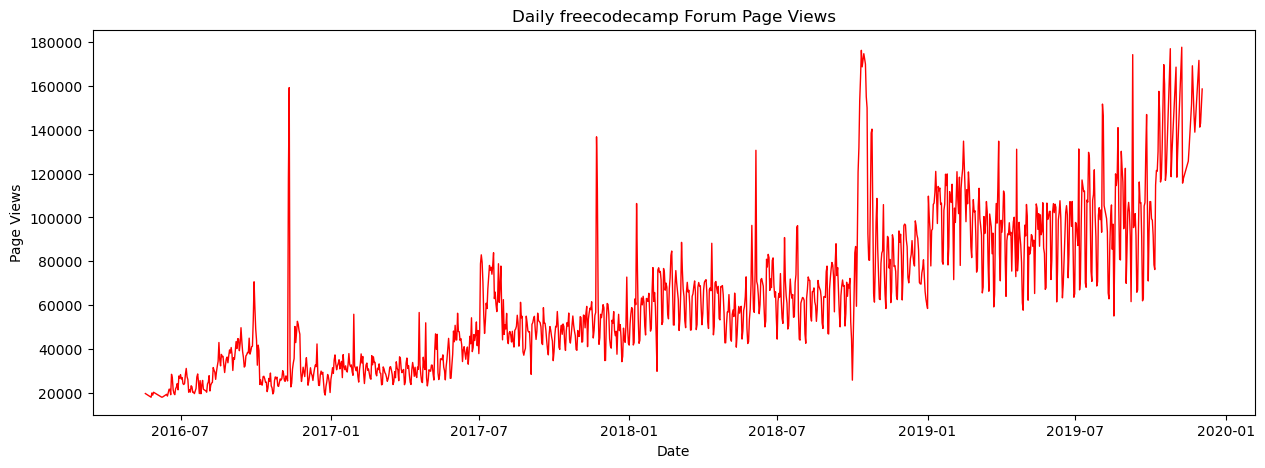

In [12]:
fig = draw_line_plot()
plt.show(fig)

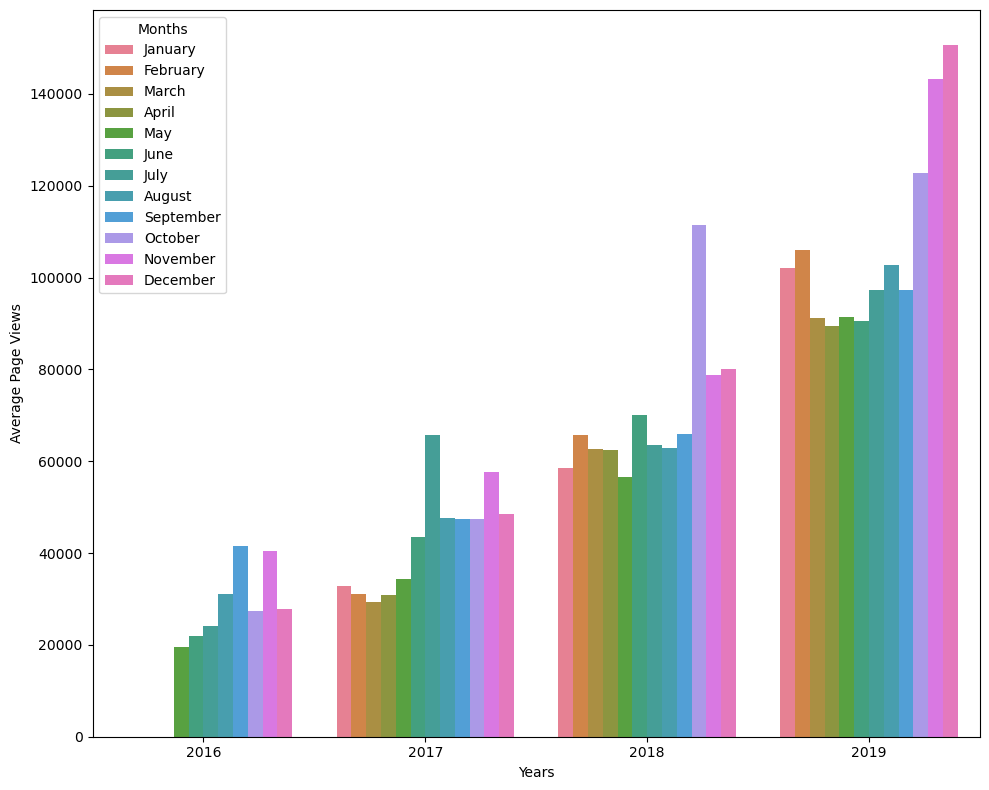

In [11]:
fig = draw_bar_plot()
plt.show(fig)

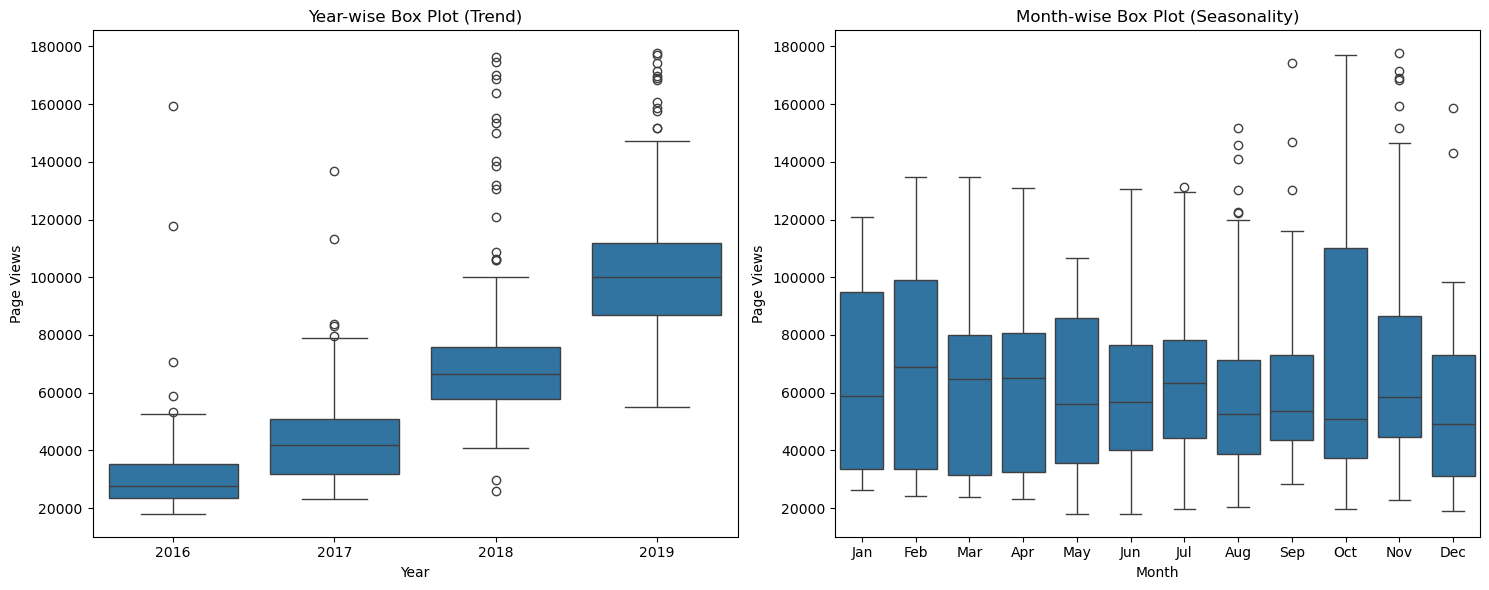

In [ ]:
fig = draw_box_plot()
plt.show() 
